In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn_pandas import DataFrameMapper
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup
from os.path import abspath
import urllib
import pandas as pd
import pickle 
import numpy as np
import xgboost as xgb
import os
from keras.models import load_model
import shutil
import cv2
image_size=128
import os
import tensorflow as tf
import cv2
import glob
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split
import numpy
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Input,Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [2]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications import vgg16
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Activation,GlobalAveragePooling2D,concatenate
from keras.applications.mobilenet import MobileNet

In [398]:
train_path=r'C:\Users\kasandeep\Desktop\Projects\Twitter_Data\Training_Data'
image_size=128
classes=os.listdir(train_path)
def load_train(train_path, image_size, classes):
    images = []
    labels = []
    img_names = []

    print('Going to read training images')
    for fields in classes:   
        index = classes.index(fields)
        print('Now going to read {} files (Index: {})'.format(fields, index))
        path = os.path.join(train_path, fields, '*g')
        files = glob.glob(path)
        for fl in files:
            image = cv2.imread(fl)
            image = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR)
            image = image.astype(np.float32)
            #image = np.multiply(image, 1.0 / 255.0)
            images.append(image)
            label = np.zeros(len(classes))
            label[index] = 1.0
            labels.append(label)
            #labels.append(fields)#for regression
            flbase = os.path.basename(fl)
            img_names.append(flbase)
    images = np.array(images)
    labels = np.array(labels)
# =============================================================================
#     labels=np.reshape(labels,(-1,1))
# =============================================================================
    img_names = np.array(img_names)

    return images, labels, img_names


In [399]:
images, labels, img_names = load_train(train_path, image_size, classes)
images, labels, img_names = shuffle(images, labels, img_names) 
x_train,x_test,y_train,y_test=train_test_split(images,labels, test_size=0.33)
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3) 

Going to read training images
Now going to read Humans files (Index: 0)
Now going to read Organisations files (Index: 1)


In [25]:
# import pickle

# dbfile = open('images.pickle', 'wb') 
# pickle.dump(images, dbfile)                      
# dbfile.close()

# dbfile = open('labels.pickle', 'wb') 
# pickle.dump(labels, dbfile)                      
# dbfile.close()

# dbfile = open('img_names.pickle', 'wb') 
# pickle.dump(img_names, dbfile)                      
# dbfile.close()

In [75]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [76]:
cnn_model=Model(inputs=base_model.input,outputs=preds)
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# model.summary()

# batch_size = 32
# epochs = 1

# train_datagen = ImageDataGenerator(
#         rotation_range=30, 
#         width_shift_range=0.1,
#         height_shift_range=0.1, 
#         horizontal_flip=True)

# train_datagen.fit(x_train)

# history = model.fit_generator(
    
#     train_datagen.flow(x_train, y_train, batch_size=batch_size),
#     use_multiprocessing=True,workers=8,
#     steps_per_epoch=x_train.shape[0] // batch_size,
#     epochs=epochs,
#     validation_data=(x_test, y_test),
#     callbacks=[ModelCheckpoint("best_weights_mobile.hdf5", monitor='val_acc', save_best_only=True)]
# )

# model.load_weights('best_weights_mobile.hdf5')
# model.save('shapes_cnn_mobile.h5')

# Using NLP

In [222]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [212]:
train=pd.read_excel(r'C:/Users/kasandeep/Desktop/Projects/Twitter_Data/Human_Organisation_Bios.xlsx')
train=train.replace('Human','Individuals')
train=train.replace('Companies','Organisation')
y_map={'Organisation':1,'Individuals':0,}
train['Classification']=[y_map[i] for i in train['Classification']]
test1=train['Classification']
#train=train.drop(['Classification'],axis=1)
for i in train:
    train[i]=train[i].astype(str)
#mapper = DataFrameMapper([('Bios',TfidfVectorizer())])
#X=mapper.fit_transform(train)
# tfidfconverter = TfidfVectorizer()
# tfidfconverter.fit(new_train['Bios'])
# X=tfidfconverter.transform(train['Bios'])
#sentences_train, sentences_test, y_train, y_test = train_test_split(train,test1,test_size=0.3)
# from sklearn.ensemble import RandomForestClassifier
# # rfc = RandomForestClassifier()
# # rfc.fit(X_train,y_train)
# xgb_model = xgb.XGBClassifier(objective="binary:logistic")
# xgb_model.fit(X_train,y_train)

In [213]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train['Bios'])

X_train = tokenizer.texts_to_sequences(train['Bios'])
# X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [214]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [195]:
# g=[]
# for i in os.listdir(r'C:/Users/kasandeep/Desktop/Projects/Twitter_Data/Training_Data/Organisations/'):
#     g.append(i.split('.')[0])

In [114]:
# z=x+y

In [196]:
# train=pd.read_excel(r'C:/Users/kasandeep/Desktop/Projects/Twitter_Data/Organisation_Bios_Final.xlsx')

In [197]:
# d=[]
# for i in train['ScreenName']:
#     d.append(i)

In [199]:
# f=[x for x in g if x not in d]

In [215]:
# train[z.isin(train['ScreenName'])].shape

In [216]:
# images.shape

In [290]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
#model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.Flatten()) 
#or model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# history = model.fit(X_train, y_train,
#                     epochs=20,
#                     verbose=True,
#                     validation_data=(X_test, y_test),
#                     batch_size=10)
# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))
# plot_history(history)

In [291]:
text_model=model

In [402]:
text_model.output

<tf.Tensor 'dense_34/Sigmoid:0' shape=(?, 1) dtype=float32>

In [294]:
combinedInput = concatenate([text_model.output, cnn_model.output])
x = Dense(40, activation="relu")(combinedInput)
x = Dropout(0.5)(x)
x = Dense(1, activation="softmax")(x)
 model = Model(inputs=[text_model.input, cnn_model.input], outputs=x)

In [220]:
split = train_test_split(X_train, images, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

In [273]:
testImagesX.shape

(2110, 128, 128, 3)

In [272]:
test1[6330:].shape

(2110,)

In [299]:
opt = Adam(lr=1e-3, decay=1e-3 / 200)

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
 
# train the model
print("[INFO] training model...")
model.fit([trainAttrX, trainImagesX], test1[0:6330],validation_data=([testAttrX, testImagesX], test1[6330:]),epochs=2, batch_size=8)
 
model.save('text_image.h5')
preds = model.predict([testAttrX, testImagesX])

[INFO] training model...
Train on 6330 samples, validate on 2110 samples
Epoch 1/2
6330/6330 [==============================] - 593s 94ms/step - loss: 10.3966 - acc: 0.3220 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/2
  96/6330 [..............................] - ETA: 8:42 - loss: 9.7430 - acc: 0.3646

KeyboardInterrupt: 

In [314]:
from keras.layers.merge import concatenate
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tags = le.fit_transform(test1)

In [320]:
images.shape

(1, 128, 128, 3)

In [401]:
import numpy as np
from keras.layers import Dropout
from keras import applications
from keras.layers import Dense, GlobalAveragePooling2D, merge, Input
from keras.models import Model

max_words = 100
epochs = 2
batch_size = 32

X_train_image = images
X_train_text = X_train
y_train = test1

#num_classes = np.max(y_train) + 1
#print(num_classes)
# Text input branch - just a simple MLP
text_inputs = Input(shape=(max_words,))
branch_1 = Dense(1024, activation='relu')(text_inputs)

# Image input branch - a pre-trained Inception module followed by an added fully connected layer
#base_model = applications.InceptionV3(weights='imagenet', include_top=False)
base_model=applications.MobileNet(weights='imagenet',include_top=False)
# Freeze Inception's weights - we don't want to train these
for layer in base_model.layers:
    layer.trainable = False


# add a fully connected layer after Inception - we do want to train these
branch_2 = base_model.output
branch_2 = GlobalAveragePooling2D()(branch_2)
branch_2 = Dense(1024, activation='relu')(branch_2)

# merge the text input branch and the image input branch and add another fully connected layer
joint = concatenate([branch_2, branch_1])
joint = Dense(512, activation='relu')(joint)
joint = Dropout(0.5)(joint)
predictions = Dense(1, activation='sigmoid')(joint)

full_model = Model(inputs=[text_inputs,base_model.input], outputs=[predictions])

opt=Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=False)


full_model.compile(loss='binary_crossentropy',
                   optimizer=opt,
                   metrics=['accuracy'],)

history = full_model.fit([X_train_text, X_train_image], y_train,
                         epochs=epochs, batch_size=batch_size,
                         verbose=1, validation_split=0.2, shuffle=True)
full_model.save('text_image2_lr.h5')

Train on 6752 samples, validate on 1688 samples
Epoch 1/2
6752/6752 [==============================] - 268s 40ms/step - loss: 16.1617 - accuracy: 0.5918 - val_loss: 0.8817 - val_accuracy: 0.0877
Epoch 2/2
6752/6752 [==============================] - 262s 39ms/step - loss: 0.6806 - accuracy: 0.6343 - val_loss: 0.9189 - val_accuracy: 0.0172


In [375]:
predictions=full_model.predict([X_train_text, X_train_image])

In [326]:
full_model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_40[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 3 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 3 128         conv1[0][0]                      
___________________________________________________________________________________________

In [335]:
full_model2=full_model

In [374]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [384]:
import matplotlib.pyplot as plt



(array([8.425e+03, 3.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.36009502, 0.42408553, 0.48807603, 0.5520665 , 0.61605704,
        0.6800475 , 0.744038  , 0.8080285 , 0.872019  , 0.9360095 ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

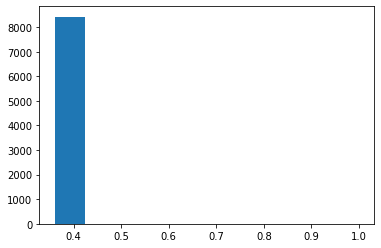

In [395]:
#plt.plot(predictions)
plt.hist(predictions)

In [376]:
Find_Optimal_Cutoff(y_train,predictions[:,1])

IndexError: index 1 is out of bounds for axis 1 with size 1

In [373]:
x=pd.DataFrame(columns=['Bios'])
x['Bios']=['Creative available for commission work. Specializing in concept development, illustration, murals, graphics and 3-D set design & construction.']
max_len = 100
cnn_texts_seq = tokenizer.texts_to_sequences(x['Bios'])
print(cnn_texts_seq[0])
cnn_texts_mat = pad_sequences(cnn_texts_seq,maxlen=max_len)

[17, 7, 531, 2671, 353, 1714, 1, 2, 6, 8, 1, 2]


(1, 100)

In [417]:
image2=[]
image = cv2.imread(r'C:\Users\kasandeep\Desktop\Projects\Twitter_Data\UHMD8N0l_400x400.jpeg')
image1 = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR)
image2.append(image1)
image2 = np.array(image2, dtype=np.uint8)
image2 = image2.astype('float32')

In [419]:
intermediate_layer_model.predict(image2).shape

(1, 32, 32, 64)

In [368]:
full_model.predict([cnn_texts_mat,image2])

array([[0.360095]], dtype=float32)

In [362]:
df.head()

,Unnamed: 0,ScreenName,FollowingCount,FollwersCount,Column1,KeyInfluencerName,Language,WebSite,links,output,probofind,scrapped_link,Description_name
0,0,zzste,6502,7420,88,Stefano Mosconi,Italian,https://t.co/pnK1xqKlL6,https://twitter.com/zzste,Individuals,0.999785,https://pbs.twimg.com/profile_images/110500653...,Entrepreneur | @JollaHQ Cofounder | Geek | Dad...
1,1,zolezorule,4666,4252,11,Zole Zorule,English,NaN,https://twitter.com/zolezorule,Individuals,0.999990,https://pbs.twimg.com/profile_images/527439346...,"Serbs are a small nation, but - lo and behold!..."
2,2,Zimmapp,4142,1794,7,ZiMM,English,http://t.co/ejdJi0cRCf,https://twitter.com/Zimmapp,Companies,0.000142,https://pbs.twimg.com/profile_images/628001960...,Interactive & User Friendly Job Matching Tool ...
3,3,PrasanthGode,4740,4189,38,Prasanth Gode,English,https://t.co/jhosEgZqia,https://twitter.com/PrasanthGode,Individuals,1.000000,https://pbs.twimg.com/profile_images/101858004...,"A passionate #Blogger, #Gamer and more over a ..."
4,4,prashantviet,692,1457,8,Prashant Srivastava,English,https://t.co/jAtr28Hhuf,https://twitter.com/prashantviet,Individuals,1.000000,https://pbs.twimg.com/profile_images/900659313...,Hi everyone I am working as an #InternetMarket...


In [363]:
y=[]
for i in df['ScreenName']:
    link='https://twitter.com/'+i
    try:
        html_page = urllib.request.urlopen(link,timeout=10)
    except (urllib.error.HTTPError,urllib.error.URLError):
        print('I cannot handle this situation!')
    soup = BeautifulSoup(html_page)
    if os.path.exists('twitter'):
        pass
    else:
        os.mkdir('twitter')
    urllib.request.urlretrieve(soup.find(class_="ProfileAvatar-image").get('src'),  r'C:\Users\kasandeep\Desktop\Projects\Twitter_Data\twitter'+"\\"+link.split('/')[3]+'.jpg')
    text=soup.find(class_="ProfileHeaderCard-bio u-dir").get_text()
    x=pd.DataFrame(columns=['Bios'])
    x['Bios']=["'"+text+"'"]
    max_len = 100
    cnn_texts_seq = tokenizer.texts_to_sequences(x['Bios'])
    cnn_texts_mat = pad_sequences(cnn_texts_seq,maxlen=max_len)
    images=[]
    image = cv2.imread(r'C:\Users\kasandeep\Desktop\Projects\Twitter_Data\twitter'+"\\"+link.split('/')[3]+'.jpg')
    image1 = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR)
    images.append(image1)
    images = np.array(images, dtype=np.uint8)
    images = images.astype('float32')
    #images = np.multiply(images, 1.0/255.0)
    print(model.predict([cnn_texts_mat,images]))
    for i in model.predict([cnn_texts_mat,images]):
            if i<0.5:
                print('It is a human profile')
                y.append('Human')
            else:
                print('It is an organisation profile')
                y.append('Organisation')
    shutil.rmtree('twitter')

[[1.]]


IndexError: index 1 is out of bounds for axis 0 with size 1

# Scrapping the data for Individuals

In [31]:
import os

In [32]:
z=[]
for i in os.listdir(r'C:/Users/kasandeep/Desktop/Projects/Twitter_Data/Training_Data/Organisations/'):
    z.append(i.split('.')[0])

In [200]:
text2=[]

In [201]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
#train=pd.read_excel(r'C:\Users\kasandeep\Desktop\Projects\CB_Insights\CeosHandles.xlsx',names=["CEO"])
for i in f:
    try:
        html_page = urllib.request.urlopen('https://twitter.com/'+i,timeout=10)
    except (urllib.error.HTTPError,urllib.error.URLError,UnicodeEncodeError,ConnectionResetError,AttributeError):
        pass
    soup = BeautifulSoup(html_page)
    try:
        print(i)
        text2.append([i,soup.find(class_="ProfileHeaderCard-bio u-dir").get_text()])
    except (AttributeError,OSError,ConnectionResetError):
        print('Pass this situation!')

bbradesco
Pass this situation!
bensonhillbio
Pass this situation!
JyoteMotors
Pass this situation!
kartrocket
Pass this situation!
RICSNorth
Pass this situation!
ShopMedMen
Pass this situation!
spring
Pass this situation!
transurbangroup
Pass this situation!
vitolgroup


In [202]:
df=pd.read_excel('Human_Bios_Final.xlsx')
df1=pd.read_excel('Organisation_Bios_Final.xlsx')

In [203]:
train=pd.concat([df,df1])

In [204]:
train.shape

(8440, 3)

In [205]:
train.to_excel('Human_Organisation_Bios.xlsx')

In [254]:
df=pd.read_csv(r'10k_tested.csv',encoding = "ISO-8859-1")

In [255]:
df['Description_name']=df['Description_name'].astype(str)

In [256]:
df.head()

,Unnamed: 0,ScreenName,FollowingCount,FollwersCount,Column1,KeyInfluencerName,Language,WebSite,links,output,probofind,scrapped_link,Description_name
0,0,zzste,6502,7420,88,Stefano Mosconi,Italian,https://t.co/pnK1xqKlL6,https://twitter.com/zzste,Individuals,0.999785,https://pbs.twimg.com/profile_images/110500653...,Entrepreneur | @JollaHQ Cofounder | Geek | Dad...
1,1,zolezorule,4666,4252,11,Zole Zorule,English,NaN,https://twitter.com/zolezorule,Individuals,0.999990,https://pbs.twimg.com/profile_images/527439346...,"Serbs are a small nation, but - lo and behold!..."
2,2,Zimmapp,4142,1794,7,ZiMM,English,http://t.co/ejdJi0cRCf,https://twitter.com/Zimmapp,Companies,0.000142,https://pbs.twimg.com/profile_images/628001960...,Interactive & User Friendly Job Matching Tool ...
3,3,PrasanthGode,4740,4189,38,Prasanth Gode,English,https://t.co/jhosEgZqia,https://twitter.com/PrasanthGode,Individuals,1.000000,https://pbs.twimg.com/profile_images/101858004...,"A passionate #Blogger, #Gamer and more over a ..."
4,4,prashantviet,692,1457,8,Prashant Srivastava,English,https://t.co/jAtr28Hhuf,https://twitter.com/prashantviet,Individuals,1.000000,https://pbs.twimg.com/profile_images/900659313...,Hi everyone I am working as an #InternetMarket...


In [ ]:
y=[]
X=tfidfconverter.transform(df['Description_name'])
#X = tfidfconverter.transform(X).toarray()
for i in xgb_model.predict(X):
    if i==1:
        print('\n')
        print( 'It is an Organisation Account')
        y.append('Companies')
    else:
        print('\n')
        print('It is a Human Account')
        y.append('Individual')

In [420]:
e_model=load_model('shapes_cnn_mobile.h5')

In [411]:
e_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [425]:
intermediate_layer_model = Model(inputs=e_model.input,
                                 outputs=e_model.get_layer('dense_1').output)
#intermediate_output = intermediate_layer_model.predict(data)

In [426]:
intermediate_layer_model.predict(image2).shape

(1, 1024)

In [ ]:
e_model2=load_model('LSTM_text.h5')

In [ ]:
intermediate_layer_model2 = Model(inputs=e_model2.input,
                                 outputs=e_model2.get_layer('dense_1').output)